https://github.com/factbook/factbook.sql/releases

# Analyzing CIA Factbook Data Using SQLite and Python

## Introduction



DATAQUEST: In this project, we'll work with data from the CIA World Factbook, a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like:

population - The population as of 2015.
population_growth - The annual population growth rate, as a percentage.
area - The total land and water area.
You can download the SQLite database, factbook.db, from this GitHub repo if you want to work with it on your own computer. In this guided project, we'll explore the Python SQLite workflow to explore, analyze, and visualize data from this database. First things first, let's get familiar with the database.

Throughout this course, we always introduced the name of the table and what the table looked like in the jobs.db database we worked with. We can actually query the database to get this information directly:

In the last mission, we learned how to connect to a SQLite database and query it using the sqlite3 module. When working in the Jupyter notebook environment, we can actually use pandas to run SQL queries and display the results neatly as a DataFrame object. We create a sqlite3.Connection instance as usual and then use pandas.read_sql_query(sql, con) to handle running the query and returning the results in a table:


In [5]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('factbook.db')
q1 = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q1, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [8]:
q2 = "SELECT * FROM facts LIMIT 5;"
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


DATAQUEST: Here are the descriptions for some of the columns:

name - The name of the country.
area - The total land and sea area of the country.
population - The country's population.
population_growth- The country's population growth as a percentage.
birth_rate - The country's birth rate, or the number of births a year per 1,000 people.
death_rate - The country's death rate, or the number of death a year per 1,000 people.
area- The country's total area (both land and water).
area_land - The country's land area in square kilometers.
area_water - The country's waterarea in square kilometers.

Let's start by calculating some summary statistics and look for any outlier countries.

## Summary Statistics

In [9]:
q3 = '''
SELECT min(population) min_pop, max(population) max_pop,
min(population_growth) min_growth, max(population_growth) max_growth
FROM facts;
'''
pd.read_sql_query(q3, conn)

,min_pop,max_pop,min_growth,max_growth
0,0,7256490011,0.0,4.02


DATAQUEST: A few things stick out from the summary statistics in the last screen:

there's a country with a population of 0
there's a country with a population of 7256490011 (or more than 7.2 billion people)
Let's zoom in on just these countries. 

## Exploring Outliers

In [11]:
q4 = '''
SELECT *
FROM facts
WHERE population == (SELECT min(population) FROM facts);
'''
pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [12]:
q5 = '''
SELECT *
FROM facts
WHERE population == (SELECT max(population) FROM facts);
'''
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


When we look closer at the outliers in the database we can see that the population of more than 7 billion refers to the entire world, and the population of 0 refers to Antarctica. When we look at the [CIA factbook page for Antarctica](https://www.cia.gov/library/publications/the-world-factbook/geos/ay.html) we see that this number is accurate.

We will ignore these 2 rows and generate histograms for the rest of the countries in the table.

## Histograms

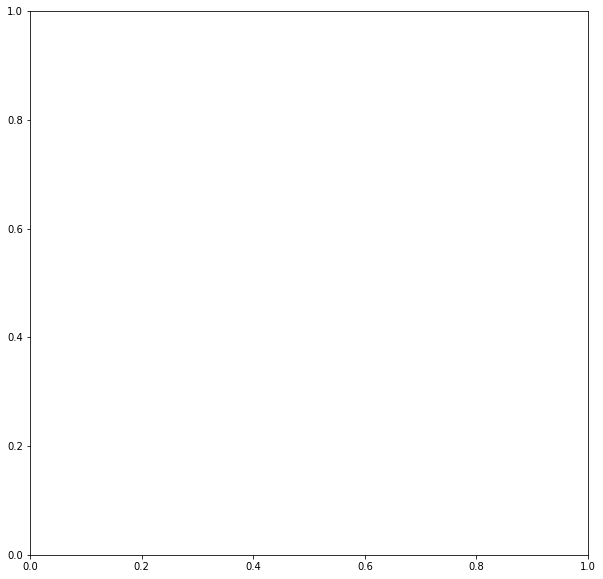

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/Users/Beckett/Developer/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3291: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fece0eb3278>,
      dtype=object)

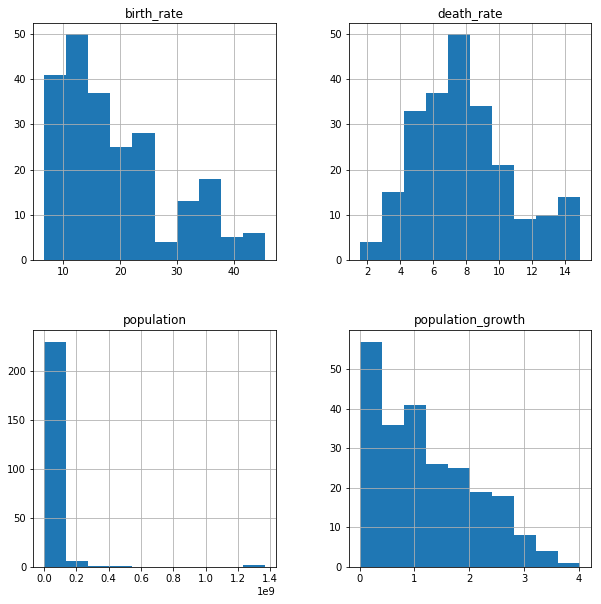

In [25]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = '''
SELECT population, population_growth, birth_rate, death_rate
FROM facts
WHERE population != (SELECT min(population) FROM facts)
AND population != (SELECT max(population) FROM facts);
'''
pd.read_sql_query(q6, conn).hist(ax=ax)

DATAQUEST: That's it for the guided steps. Here are some next steps for you to explore:

Which countries have the highest population density?
Population density is the ratio of population to land area. Compare your results with those from Wikipedia.
Generate a histogram of population densities.
Which countries have the highest ratios of water to land? Which countries have more water than land?

## Countries with the Highest Population Density

In [27]:
q7 = '''
SELECT name, CAST(population AS float)/CAST(area AS float) density
FROM facts
ORDER BY density DESC LIMIT 20
'''
pd.read_sql_query(q7, conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8141.279770
3,Hong Kong,6445.041516
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


In [ ]:
q8 = '''
'''